Joueur Bas

In [1]:
from smart.model import ModelJoueurConvolution
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
import matplotlib.pyplot as plt

In [2]:
# Config
NB_FRAMES = 30
WIDTH = 100
HEIGHT = 100
PATH_DATA = 'img/JBas'

In [3]:
layers = [
    tf.keras.Input(shape = (WIDTH, NB_FRAMES * HEIGHT, 3)), # 50, 15*50, 3
    Conv2D(filters=16, kernel_size=(3, 3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
        
    # Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
    # BatchNormalization(),
    # MaxPooling2D(pool_size=(2, 2)),
    # Dropout(0.2),
        
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
        
    Flatten(),
    # Dense(units=128, activation="relu"),
    Dense(units=4, activation="softmax"),
]

In [4]:
# Load the model
model = ModelJoueurConvolution.load_model_from_layers(layers)
model.summary_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 2998, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 98, 2998, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 1499, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 1499, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 1497, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 47, 1497, 32)     1

In [5]:
list_videos, y = model.analyse_sequence_frame(PATH_DATA, nb_frame=NB_FRAMES)
list_videos

In [6]:
y = model.label_encoder(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3], dtype=int64)

In [7]:
# Split the data
X_train, y_train, X_test, y_test = model.split_train_test(list_videos, y, test_size=0.2,
                                        shape_frame=(WIDTH, HEIGHT, 3), nb_frame=NB_FRAMES)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((143, 100, 3000, 3), (143,), (36, 100, 3000, 3), (36,))

(array([47.,  0.,  0., 28.,  0.,  0., 43.,  0.,  0., 25.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

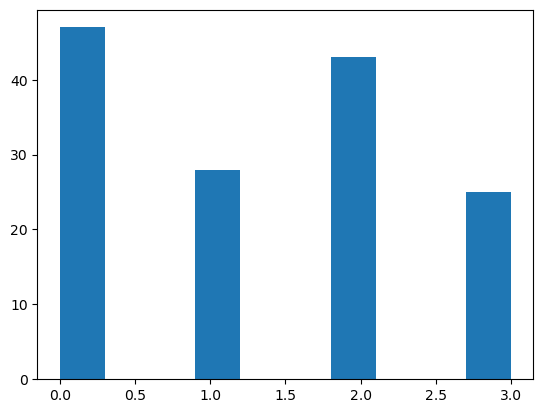

In [8]:
plt.hist(y_train)

In [9]:
# Train the model
history = model.train(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
4/4 [==============================] - ETA: 0s - loss: 356.7950 - accuracy: 0.3070
Epoch 1: val_loss improved from inf to 1635.41296, saving model to checkpoints\Weights-001--1635.41296.hdf5
4/4 [==============================] - 10s 2s/step - loss: 356.7950 - accuracy: 0.3070 - val_loss: 1635.4130 - val_accuracy: 0.1379
Epoch 2/10
4/4 [==============================] - ETA: 0s - loss: 42.7119 - accuracy: 0.6754
Epoch 2: val_loss improved from 1635.41296 to 1411.14563, saving model to checkpoints\Weights-002--1411.14563.hdf5
4/4 [==============================] - 8s 2s/step - loss: 42.7119 - accuracy: 0.6754 - val_loss: 1411.1456 - val_accuracy: 0.0345
Epoch 3/10
4/4 [==============================] - ETA: 0s - loss: 34.4070 - accuracy: 0.7544
Epoch 3: val_loss improved from 1411.14563 to 1045.59851, saving model to checkpoints\Weights-003--1045.59851.hdf5
4/4 [==============================] - 8s 2s/step - loss: 34.4070 - accuracy: 0.7544 - val_loss: 1045.5985 - val_accurac

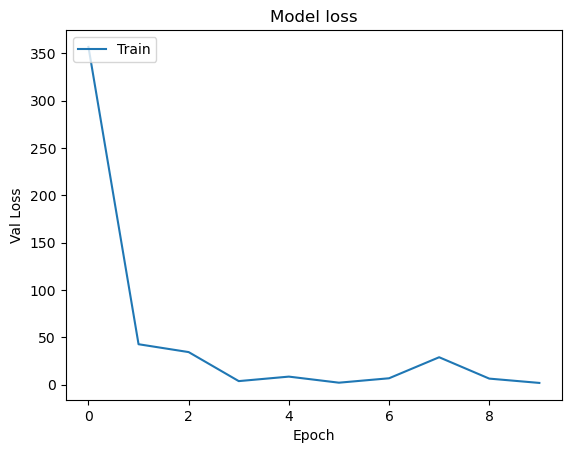

In [11]:
# Visualisation
plt.plot(history.history['loss'])
plt.title('Model loss')  
plt.ylabel('Val Loss')  
plt.xlabel('Epoch')  
plt.legend(['Train'], loc='upper left')  
plt.show()

In [10]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 72ms/step - loss: 231.7183 - accuracy: 0.2778
Loss:  231.71826171875
Accuracy:  0.2777777910232544


[231.71826171875, 0.2777777910232544]

In [10]:
model.save_model('saved_models/model_joueur_bas_convolution_Maxime.h5')